In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df1 = pd.read_excel('./datasets/Aracaju.xlsx')
df2 = pd.read_excel('./datasets/Fortaleza.xlsx')
df3 = pd.read_excel('./datasets/Natal.xlsx')
df4 = pd.read_excel('./datasets/Recife.xlsx')
df5 = pd.read_excel('./datasets/Salvador.xlsx')

In [44]:
df = pd.concat([df1, df2, df3, df4, df5])
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [45]:
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [46]:
df["mês_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [47]:

df["Ano_Venda"] = df["Data"].dt.year

In [48]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
854      28
1004     28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<AxesSubplot:>

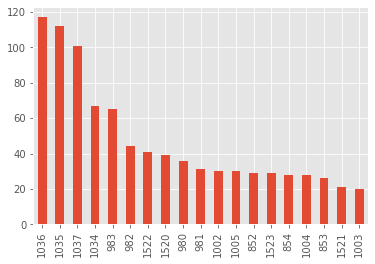

In [49]:
#Aqui é gerado um gráfico de barras verticais

df["LojaID"].value_counts(ascending=False).plot.bar()

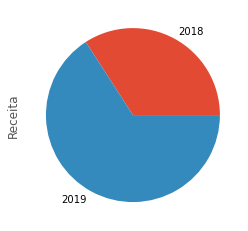

In [50]:
#Gráfico de pizza 
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [51]:
#Total vendas por cidade

df["Cidade"].value_counts()

Salvador     240
Natal        240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

Text(0, 0.5, 'Total vendas')

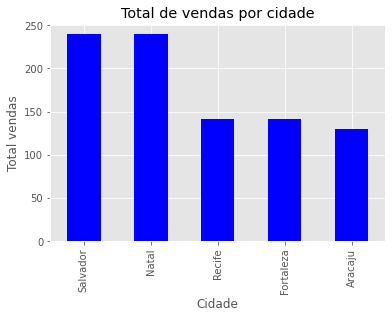

In [52]:
#Adicionando um título e alterando o nome dos eixos

from turtle import title


df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="blue")
plt.xlabel("Cidade")
plt.ylabel("Total vendas")

In [53]:
#Alterando o estilo

plt.style.use("ggplot")

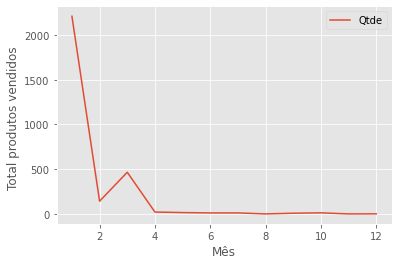

In [54]:
df.groupby(df["mês_venda"])["Qtde"].sum().plot()
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos ")
plt.legend()

In [55]:
df.groupby(df["mês_venda"])["Qtde"].sum()

mês_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [56]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano_Venda"] == 2019]

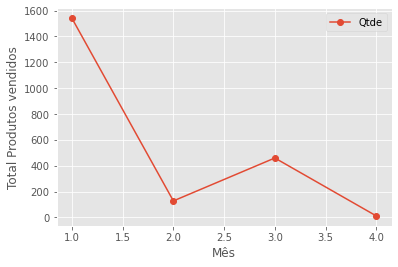

In [60]:
#Total de produtos vendidos por mês

df_2019.groupby(df_2019["mês_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos vendidos")
plt.legend()

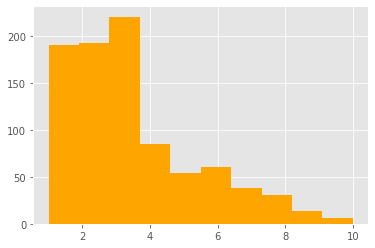

In [62]:
#Histograma

plt.hist(df["Qtde"], color="orange");

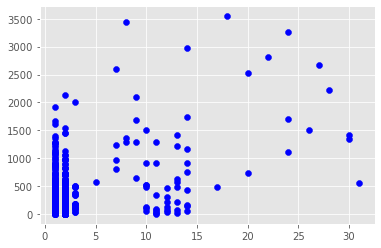

In [65]:
from turtle import color


plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"], color = "blue");

<AxesSubplot:xlabel='mês_venda'>

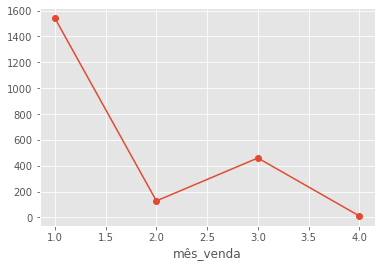

In [67]:
#Salvando em PNG
df_2019.groupby(df_2019["mês_venda"])["Qtde"].sum().plot(marker = "o")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("Grafico QTDE X MES.png")